In [1]:
#colab doğrulama
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [5]:
#Google Drive içinde ve doğru klasörde bulunmamız için gereken ve kontrol adımları:
import os 
os.chdir("/gdrive/My Drive/calisma_ortami")

In [6]:
!ls

 app.py
 colabCalismaOrtami.ipynb
 EvrisimliSinirAgi.ipynb
'IMAGENET - VGG16 - NESNE TANIMA.ipynb'
'Katmanlar ve Modeller.ipynb'
 MNIST_YSA.ipynb
 nesne_tanima
'RakamTanima_CNN.ipynb adlı not defterinin kopyası'
 RNN_IMDB_UYGULAMASİ.ipynb
 save_models
 transfer_learning.ipynb
 Uygulama_Rakam_Tanima.ipynb
'Vektörler   Matrisler   Tensörler.ipynb'


In [7]:
#Kütüphane kurulumu
!pip3 install -q keras


ImageNet projesi, görsel nesne tanıma yazılımı araştırmasında kullanılmak üzere tasarlanmış geniş bir görsel veritabanıdır.

On milyondan fazla etiketli resim bulunmaktadır.

ImageNet veri setinde önceden eğitilmiş bir modeli göreceğiz. 16 katmanlı VGG Net (VGG16) modelini kullanacağız

In [15]:
#Keras kütüphanesinden import edilmesi gerekenler: VGG16 eğitilmiş modeli
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

import requests
from io import BytesIO

In [9]:
#Keras'ta önceden ImageNet veri kümesinde eğitilmiş bir modeli yükleme

model = VGG16(weights = 'imagenet', include_top=True)

553467904/553467096 [==============================] - 8s 0us/step


In [10]:
#Model yapısına bir göz atalım: Hangi katmanlar kullanılmış
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(None, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(None, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(None, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(None, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(None, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(None, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(None, 28, 28,

In [11]:
#Toplam parametre sayısı
model.count_params()

138357544

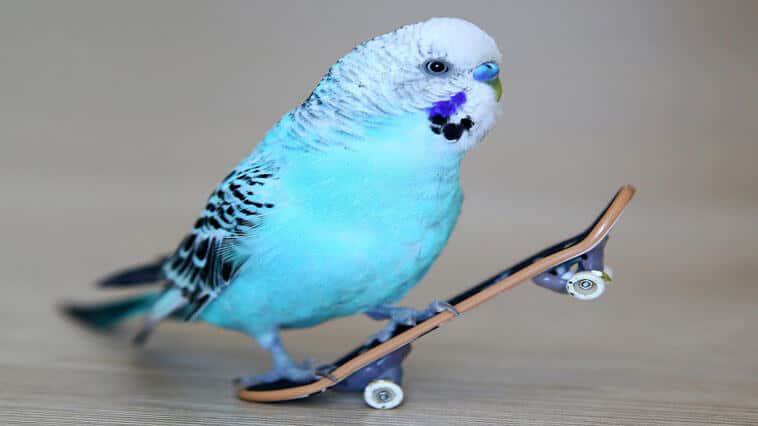

In [16]:
ImageURL = "https://ajanimo.com/wp-content/uploads/2019/02/muhabbetkusuhakkinda.jpg"
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

#veya drivedaki görseller ile deneyeceksek
#import os
#os.chdir("/gdrive/My Drive/images")
#!ls

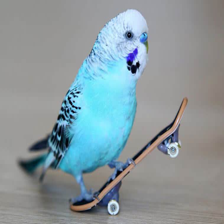

In [18]:
#Modelin giriş katmanının boyutuna göre resmi resize ediyoruz
image = image.resize((224, 224))
image

In [19]:

x = np.array(image, dtype = 'float32') #görüntüyü diziye çevirir
x = np.expand_dims(x, axis=0) #dizi listesine çevirir
x= preprocess_input(x)

In [20]:
#TEST GÖRÜNTÜSÜ İLE SINIFLAMA YAPMA
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0]) #top=3 en yüksek olasılıklı 3 değeri göstermek için kullanıldı
print(decode_predictions(preds, top=1)[0][0][1])

40960/35363 [==================================] - 0s 0us/step
predicted: [('n01580077', 'jay', 0.2285478), ('n01537544', 'indigo_bunting', 0.16201939), ('n01796340', 'ptarmigan', 0.11487152)]
jay
